In [1]:
#!pip install pyagrum

In [2]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb
import pandas as pd
from IPython.display import display, HTML

# Utilizarás los siguientes archivos:

1.   alarm.bif  
2.   dic_alarm.csv

- El archivo .bif es un archivo tipo **"Bayesian Interchange Format"**, el cual es un formato estándar basado en texto para almacenar y compartir Redes Bayesianas. En este archivo viene ya la red Bayesiana.
- el .csv trae información de cada variable con los siguientes campos: nombre, descripción, clase ('Evidencia', 'Alarma', 'Variable Inferida')

Nota: En archivo .bif podemos ver, por ejemplo:

probability ( HISTORY | LVFAILURE ) {
  (TRUE) 0.9, 0.1;
  (FALSE) 0.01, 0.99;
}

In [3]:
# Cargamos la Red Bayesiana
bn = gum.loadBN("alarm.bif") 


In [4]:
# Vemos las variables y su descripción
variables = pd.read_csv('dic_alarm.csv',
                        usecols = ['id','nombre','descripcion','categorias','clase'],
                        index_col = ['id'])
variables

,nombre,descripcion,clase,categorias
id,,,,
1,CVP,central venous pressure,Evidencia,"LOW , NORMAL , HIGH"
2,PCWP,pulmonary capillary wedge pressure,Evidencia,"LOW , NORMAL , HIGH"
3,HISTORY,history,Evidencia,"TRUE , FALSE"
4,TPR,total peripheral resistance,Evidencia,"LOW , NORMAL , HIGH"
5,BP,blood pressure,Evidencia,"LOW , NORMAL , HIGH"
6,CO,cardiac output,Evidencia,"LOW , NORMAL , HIGH"
7,HRBP,heart rate / blood pressure,Evidencia,"LOW , NORMAL , HIGH"
8,HREKG,heart rate measured by an EKG monitor,Evidencia,"LOW , NORMAL , HIGH"
9,HRSAT,heart rate / oxygen saturation,Evidencia,"LOW , NORMAL , HIGH"


# Exploración de la Red Bayesiana

#### 1. ¿Cuántas variables y dependencias entre variables hay en la red?

In [5]:
print(bn)

BN{nodes: 37, arcs: 46, domainSize: 10^16.2389, dim: 509, mem: 5Ko 896o}


#### 2. Muestra la estructura de la Red Bayesiana

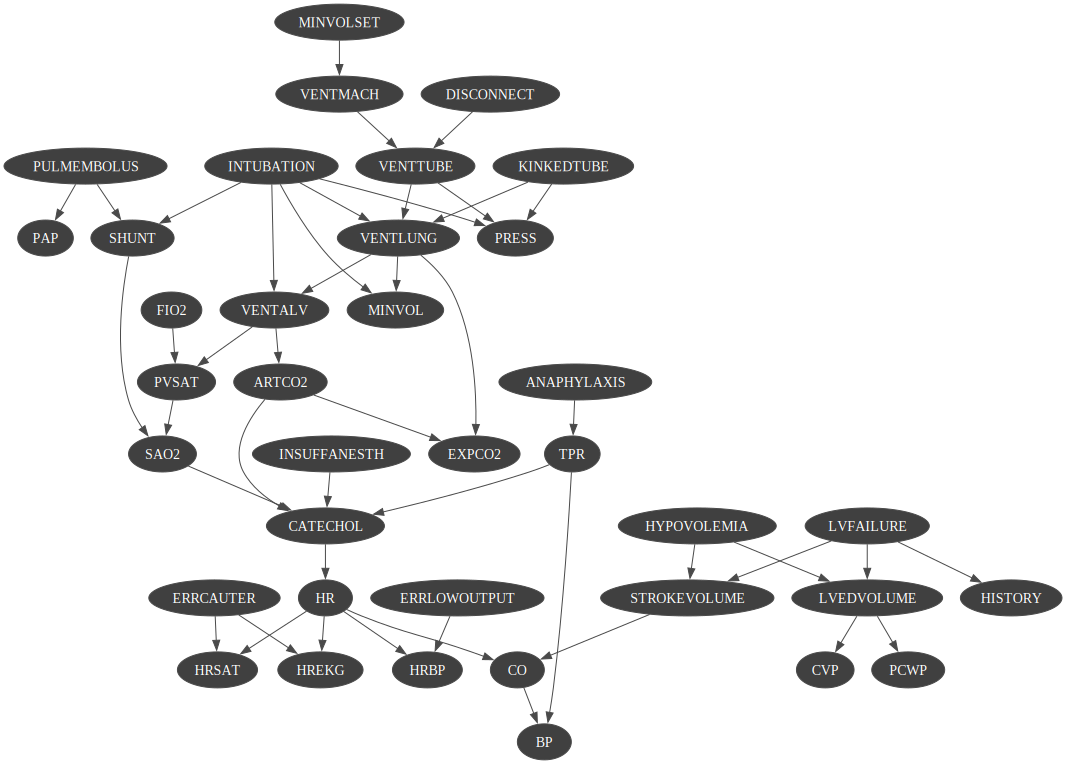

In [6]:
gnb.showBN(bn, size="20")

#### 3. ¿Cuáles son las variables clasificadas como "Alarma"?

In [8]:
variables[variables['clase']=='Alarma']

,nombre,descripcion,clase,categorias
id,,,,
17,HYPOVOLEMIA,hypovolemia,Alarma,"TRUE , FALSE"
18,LVFAILURE,left ventricular failure,Alarma,"TRUE , FALSE"
19,ANAPHYLAXIS,anaphylaxis,Alarma,"TRUE , FALSE"
20,INSUFFANESTH,insufficient anesthesia/analgesia,Alarma,"TRUE , FALSE"
21,PULMEMBOLUS,pulmonary embolus,Alarma,"TRUE , FALSE"
22,INTUBATION,intubation,Alarma,"NORMAL , ESOPHAGEAL , ONESIDED"
23,KINKEDTUBE,kinked tube,Alarma,"TRUE , FALSE"
24,DISCONNECT,disconnection,Alarma,"TRUE , FALSE"


#### 4. ¿Cuál es la probabilidad de tener insuficiencia ventricular izquierda (LVFAILURE)?

In [9]:
bn.cpt('LVFAILURE')

(pyagrum.Tensor@0x600002e148a0) 
  LVFAILURE        |
TRUE     |FALSE    |
---------|---------|
 0.0500  | 0.9500  |

#### 5. La presión de enclavamiento capilar pulmonar (PCWP), también conocida como presión de cuña pulmonar, es una medición hemodinámica que estima la presión en la aurícula izquierda y la presión diastólica final del ventrículo izquierdo.

#### Considerando el siguiente cuadro clínico:
- presión venosa central baja (CVP = LOW) y
- presión de enclavamiento capilar pulmonar baja (PCWP = LOW),

#### ¿Cuál es la probabilidad de tener insuficiencia ventricular izquierda (LVFAILURE)?

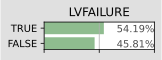

In [10]:
gnb.showPosterior(bn,evs={"CVP": "LOW", "PCWP":"LOW"},target='LVFAILURE')

#### 6. ¿Te hace sentido el resultado anterior? Justifica tu respuesta.

#### 7. ¿Cuál es la probabilidad de tener hipovolemia (HYPOVOLEMIA)?
Nota:  La hipovolemia es una afección en la que hay una disminución del volumen de sangre circulante en el cuerpo

In [11]:
bn.cpt('HYPOVOLEMIA')

(pyagrum.Tensor@0x600002e14660) 
  HYPOVOLEMIA      |
TRUE     |FALSE    |
---------|---------|
 0.2000  | 0.8000  |

#### 8. Considerando el siguiente cuadro clínico:
- presión venosa central alta (CVP = HIGH)
- presión de enclavamiento capilar pulmonar alta (PCWP = HIGH),
- presión arterial baja (BP=LOW)
- 'output cardiaco' bajo (CO=LOW)

#### ¿Cuál es la prababilidad de padecer hipovolemia?

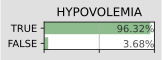

In [12]:
gnb.showPosterior(bn,evs={"CVP": "HIGH","PCWP":"HIGH", "BP":"LOW", "CO":"LOW"},
                  target='HYPOVOLEMIA')

#### 9. ¿Cómo interpretas el primer valor de 0.98 de la siguiente tabla? (ejecuta el código para mostrar la tabla)

In [13]:
## bn es la red bayesiana que guardamos al ejecutar:  bn = gum.loadBN("alarm.bif") 
bn.cpt(bn.idFromName('BP'))

(pyagrum.Tensor@0x600002e16d40) 
             ||  BP                         |
CO    |TPR   ||LOW      |NORMAL   |HIGH     |
------|------||---------|---------|---------|
LOW   |LOW   || 0.9800  | 0.0100  | 0.0100  |
NORMAL|LOW   || 0.9800  | 0.0100  | 0.0100  |
HIGH  |LOW   || 0.9000  | 0.0900  | 0.0100  |
LOW   |NORMAL|| 0.9800  | 0.0100  | 0.0100  |
NORMAL|NORMAL|| 0.1000  | 0.8500  | 0.0500  |
HIGH  |NORMAL|| 0.0500  | 0.2000  | 0.7500  |
LOW   |HIGH  || 0.3000  | 0.6000  | 0.1000  |
NORMAL|HIGH  || 0.0500  | 0.4000  | 0.5500  |
HIGH  |HIGH  || 0.0100  | 0.0900  | 0.9000  |

In [14]:
# Respuesta:  P(BP baja | CO bajo y TPR bajo)=0.98  , TPR = total peripheral resistance